<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 1: Fuzzy Logic Concepts</center></h1>
<hr>
<b> Lab date:</b> <i> Thursday, September 19, 2019 -- 2:00 - 4:50 PM </i>
<br>
<b> Room:</b> <i> ETLC E5-013 </i>
<br>
<b> Lab report due:</b> <i>Wednesday, October 2, 2019 -- 3:50 PM </i>
<hr>

<h2>1. Objectives</h2>
The objectives of this lab are to become familiar with the basic concepts of fuzzy logic.  These concepts include:
<ul>
    <li>defining membership functions and modifying them with linguistic terms</li>
    <li>performing various operations on fuzzy sets</li>
    <li>representing fuzzy sets using $\alpha$-cuts</li>
    <li>constructing fuzzy relations, projections, and cylindrical extensions</li>
    <li>performing composition and using it in compositional rules of inference</li>
</ul>

<h2>2. Expectations</h2>
Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label the axes and provide a legend when appropriate.  An abstract, introduction, and conclusion are required as well, for which cells are provided at the end of the notebook.  The abstract should be a brief description of the topic, the introduction a description of the goals of the lab, and the conclusion a summary of what you learned, what you found difficult, and your own ideas and observations.

<h2>3. Pre-lab</h2>
&emsp;1. Why is defuzzification an important step when using fuzzy sets?
<br><br>
We also strongly recommend that you look over section 1 of the Python supplement to familiarize yourself with Jupyter notebooks and install the necessary libraries for future labs.

<h2>4. Introduction</h2>
<i>Fuzzy logic</i> is a form of logic in which the truth values of variables can range from the interval of 0 to 1, instead of exclusively 0 or 1.  This can be used to solve problems in a more human-like way by allowing gradual membership in sets.  These fuzzy sets form inputs and outputs to linguistic relations that can be easily constructed, such as:

<center><b>IF</b> <i>temp</i> <b>IS</b> HOT <b>THEN</b> <i>fan</i> <b>IS</b> HIGH</center>
<br>
Employing fuzzy systems requires the user to first define membership functions that take values from 0 to 1, and are defined over the region of interest, called the <i>universe of discourse</i>.  One can apply linguistic modifiers (hedges) to modify the meaning of a fuzzy set, such as:

<center><i>temp</i> <b>IS</b> VERY HOT, rather than <i>temp</i> <b>IS</b> HOT</center>
<br>
Similar to crisp sets, the <i>union</i>, <i>intersection</i>, and <i>complement</i> operators can be performed on fuzzy sets.  They may also be represented using a family of crisp sets, by using <i>$\alpha$-cuts</i>.
<br>
Finally, a crucial aspect of fuzzy sets is the ability to form <i>relations</i> between two membership functions of different universes of discourse.  These relations bring forth more operations, such as <i>projection</i>, <i>reconstruction</i>, <i>cylindrical extension</i>, <i>sup-t composition</i>, <i>compositional rule of inference</i>, and <i>defuzzification</i>.

<h2>5. Background</h2>
Automatic monitoring stations are used to characterize the quality of the environment in the Arctic by collecting meteorological data at regular intervals.  Because of how remote these locations are, the monitoring stations are designed to generate and store power from renewable resources, namely the sun and wind, to minimize the frequency of maintenance required.  However, due to the polar nights and long winters, solar radiation reaching the ground during these times is very low or non-existent.  Consequently, this can lead to long intervals during which there is no remaining power, and no data is collected.  To avoid this, the duty cycle of the monitoring station can be adjusted in order to conserve power.  A controller to determine the optimal duty cycle can be built using fuzzy logic based on two factors: <i>state of charge</i> (SOC) of the battery and <i>future average power</i> (P) from the renewable resources.  For example, one such rule could be as follows:

<center><b>IF</b> <i>state of charge</i> <b>IS</b> LOW <b>AND</b> <i>future average power</i> <b>IS</b> MEDIUM <b>THEN</b> <i>duty cycle<i> <b>IS</b> MEDIUM</center>
<br>
In the case where this rule would apply, the monitoring station could only take measurements for around half of its regular period to conserve power, and obtain data more frequently than what the previous method would offer.  The next two labs will focus on this concept and work towards building a fuzzy controller to manage the power consumption of a monitoring station.

<h2>6. Experimental Procedure</h2>
If you have not yet installed the skfuzzy library, run the cell below.

In [6]:
# %%bash
# "--user" is essential to install in local environment"
# pip install --user -U scikit-fuzzy


Run the cell below to import the libraries required to complete this lab.

In [7]:
%matplotlib inline

import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

import numpy as np                          # General math operations
import matplotlib.pyplot as plt             # Data visualization
from mpl_toolkits.mplot3d import Axes3D     # 3D data visualization
import skfuzzy as fuzz                      # Fuzzy toolbox

plt.style.use('fivethirtyeight')

<h4>Exercise 1:&nbsp;&nbsp; Membership functions</h4>
Consider a weather station with a battery that has a minimum state of charge of 20% (and a maximum state of charge of 100%).
<br>
<ol>
    <li>Define the universe of discourse for state of charge from 20 to 100, using 81 discrete elements.</li>
</ol>

In [8]:
x = np.arange(20, 101, 1)
print(x)

[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]


<ol start=2>
    <li>Plot the trapezoidal membership functions, LOW, MEDIUM, and HIGH, on one figure according to the parameters given below.</li>
</ol>

\begin{array}{l c c c c}
\hline
Fuzzy\ set & a & b & c & d \\
\hline
LOW & 20 & 20 & 22 & 38 \\
MEDIUM & 22 & 38 & 42 & 58 \\
HIGH & 42 & 58 & 100 & 100\\
\hline
\end{array}

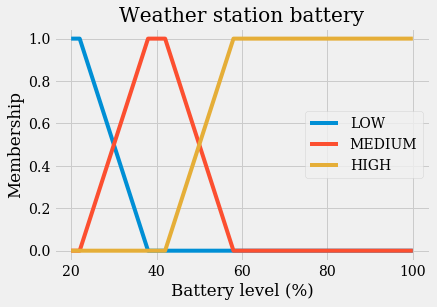

In [9]:
LOW    = fuzz.trapmf(x, [20, 20, 22, 38]);
MEDIUM = fuzz.trapmf(x, [22, 38, 42, 58]);
HIGH   = fuzz.trapmf(x, [42, 58, 100, 100]);


plt.title("Weather station battery");
plt.xlabel("Battery level (%)");
plt.ylabel("Membership");

plt.plot(x, LOW, label="LOW");
plt.plot(x, MEDIUM, label="MEDIUM");
plt.plot(x, HIGH, label="HIGH");

plt.legend();

<h4>Exercise 2:&nbsp;&nbsp; Linguistic modifiers</h4>
Modify the fuzzy set HIGH state of charge to VERY HIGH state of charge and MORE OR LESS HIGH state of charge.
<br>
<ol>
    <li>Plot HIGH, VERY HIGH, and MORE OR LESS HIGH on the same figure.</li>
</ol>

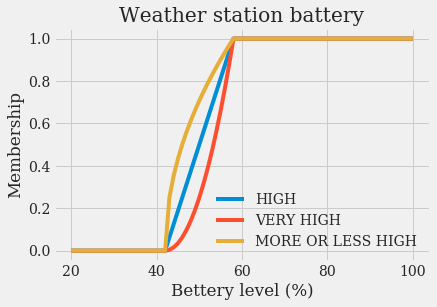

In [89]:
VERY_HIGH         = HIGH ** 2
MORE_OR_LESS_HIGH = HIGH ** 0.5

plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");

plt.plot(x, HIGH, label="HIGH");
plt.plot(x, VERY_HIGH, label="VERY HIGH");
plt.plot(x, MORE_OR_LESS_HIGH, label="MORE OR LESS HIGH");

plt.legend();

<h4>Exercise 3:&nbsp;&nbsp; Fuzzy set operations</h4>
On separate figures, plot the following fuzzy sets:
<br>
<ol>
    <li>Union of LOW and MEDIUM</li>
</ol>

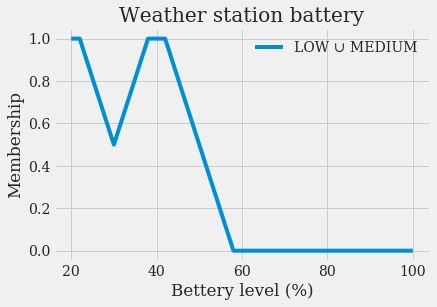

In [90]:
plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");

new_universe, LOW_OR_MEDIUM = fuzz.fuzzy_or(x, LOW, x, MEDIUM);
plt.plot(new_universe, LOW_OR_MEDIUM, label="LOW ∪ MEDIUM");

plt.legend()

<ol start=2>
    <li>Intersection of LOW and MEDIUM</li>
</ol>

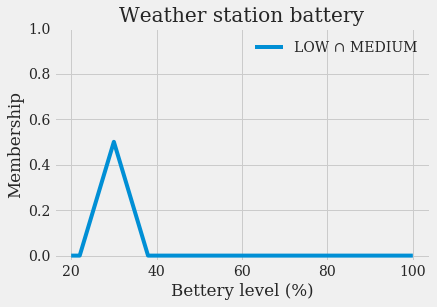

In [91]:
plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");

new_universe, LOW_AND_MEDIUM = fuzz.fuzzy_and(x, LOW, x, MEDIUM);
plt.plot(new_universe, LOW_AND_MEDIUM, label="LOW ∩ MEDIUM");
plt.ylim(top=1)

plt.legend();

<ol start=3>
    <li>Complement of HIGH</li>
</ol>

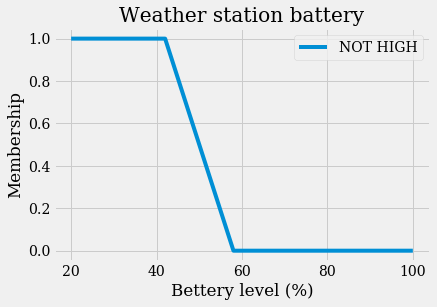

In [10]:
plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");
NOT_HIGH = fuzz.fuzzy_not(HIGH)

plt.plot(x, NOT_HIGH, label="NOT HIGH");

plt.legend();

<h4>Exercise 4:&nbsp;&nbsp; $\alpha$-cuts</h4>
Using the HIGH state of charge fuzzy set,
<br>
<ol>
    <li>Plot the individual $\alpha$-cuts for $\alpha$ = {1.0, 0.75, 0.50, 0.25} on the same figure.</li>
</ol>

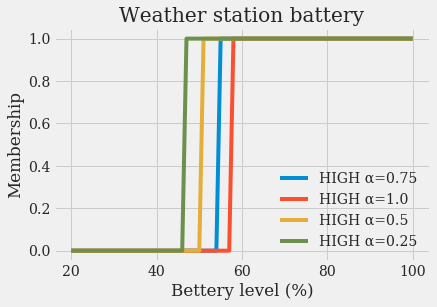

In [93]:
plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");

cuts = {1.0, 0.75, 0.50, 0.25}
for cut in cuts:
    plt.plot(x, fuzz.defuzzify.lambda_cut(HIGH, cut), label=f"HIGH α={cut}")
plt.legend();

<ol start=2>
    <li>Plot the original fuzzy set and its $\alpha$-cut reconstruction on the same figure.</li>
</ol>
&emsp;HINT: The <b>np.amax()</b> function is helpful in reconstructing the fuzzy set.

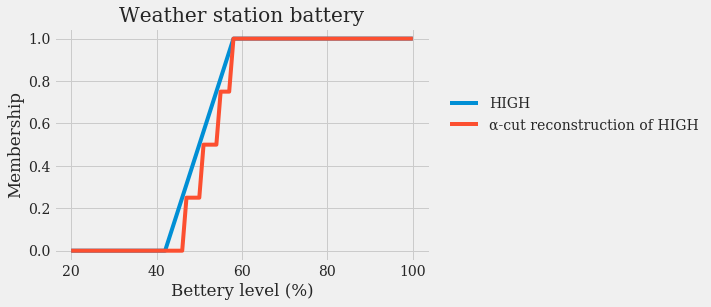

In [100]:
plt.title("Weather station battery");
plt.xlabel("Bettery level (%)");
plt.ylabel("Membership");

plt.plot(x, HIGH, label="HIGH")

union = lambda a, b: fuzz.fuzzy_or(x, a, x, b)
alphacut = lambda a, cut: fuzz.defuzzify.lambda_cut(a, cut)

final_plot = alphacut(HIGH, 1.0)
cuts = {0.75, 0.50, 0.25}
for cut in cuts:
    new_universe, final_plot = fuzz.fuzzy_or(x, final_plot, x, cut * alphacut(HIGH, cut))

plt.plot(x, final_plot, label="α-cut reconstruction of HIGH")
plt.legend(loc="lower right", bbox_to_anchor=(1.75, 0.5));

<ol start=3>
    <li>Comment on the quality of the $\alpha$-cut reconstruction.</li>
</ol>

<h4>Exercise 5:&nbsp;&nbsp; Relations</h4>
Based off of typical meteorological data, the locations in which the monitoring stations are situated can only provide future average power from 0W to 100W.
<br>
<ol>
    <li>Define the universe of discourse for future average power from 0 to 100, using 101 discrete elements.</li>
</ol>

In [58]:
x = np.arange(0, 101, 1)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


<ol start=2>
    <li>Plot the trapezoidal membership functions, SCARCE, AVERAGE, and ABUNDANT, one on figure according to the parameters given below.</li>
</ol>

\begin{array}{l c c c c}
\hline
Fuzzy\ set & a & b & c & d \\
\hline
SCARCE & 0 & 0 & 30 & 35 \\
AVERAGE & 30 & 35 & 40 & 45 \\
ABUNDANT & 40 & 45 & 100 & 100\\
\hline
\end{array}

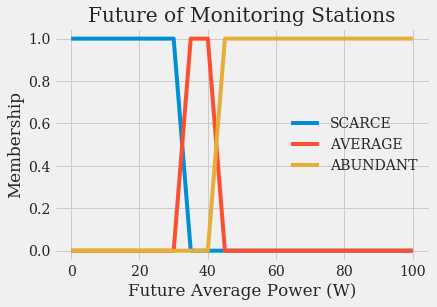

In [59]:
SCARCE    = fuzz.trapmf(x, [0, 0, 30, 35]);
AVERAGE = fuzz.trapmf(x, [30, 35, 40, 45]);
ABUNDANT   = fuzz.trapmf(x, [40, 45, 100, 100]);

plt.title("Future of Monitoring Stations");
plt.xlabel("Future Average Power (W)");
plt.ylabel("Membership");

plt.plot(SCARCE, label="SCARCE");
plt.plot(AVERAGE, label="AVERAGE");
plt.plot(ABUNDANT, label="ABUNDANT");

plt.legend();

<ol start=3>
    <li>Using <i>Larsen implication</i>, define the relation $R(MEDIUM,\ AVERAGE)$.  Plot the relation matrix.</li>
</ol>

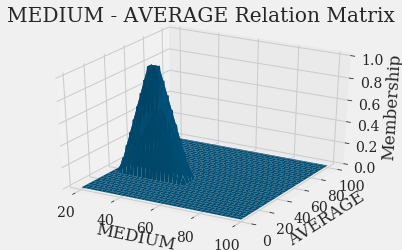

Larsen: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0.     0.     0.     0.     0.     0.     0.     0.     0.     

In [60]:
uniA = np.arange(20, 101, 1);
uniB = np.arange(0, 101, 1);

larsen = fuzz.relation_product(MEDIUM, AVERAGE);
fig = plt.figure()
[gX, gY] = np.meshgrid(uniA, uniB, indexing='ij')
ax = fig.gca(projection = '3d')
ax.plot_surface(gX, gY, larsen)
ax.set_xlabel('MEDIUM')
ax.set_ylabel('AVERAGE')
ax.set_zlabel('Membership')
ax.set_title('MEDIUM - AVERAGE Relation Matrix')
plt.show();

print("Larsen: ")
for row in larsen:
    print(row);

<ol start=4>
    <li>What is the meaning of the individual rows of the relation matrix?  What does the first row mean?</li>
</ol>

The individual rows are each fuzzy sets which relate future power in the AVERAGE fuzzy set to a single battery level in the MEDIUM fuzzy set. 
We can use this to see that the relation suggests:
IF MEDIUM state of charge THEN AVERAGE future power

Since the first row is filled with zeros, it means that there is no relation between the AVERAGE power set when battery level is zero.



<h4>Exercise 6:&nbsp;&nbsp; Projections</h4>
Determine both projections of the fuzzy relation $R(MEDIUM, AVERAGE)$.
<br>
<ol>
    <li>Print both projections as vectors.</li>
</ol>

In [61]:
mediumProj = np.amax(larsen, axis=1, keepdims=True)
averageProj = np.amax(larsen, axis=0, keepdims=True)

print(f"State of charge universe projection:\n {mediumProj}");
print();
print(f"Future power universe projection:\n {averageProj}");

State of charge universe projection:
 [[0.    ]
 [0.    ]
 [0.    ]
 [0.0625]
 [0.125 ]
 [0.1875]
 [0.25  ]
 [0.3125]
 [0.375 ]
 [0.4375]
 [0.5   ]
 [0.5625]
 [0.625 ]
 [0.6875]
 [0.75  ]
 [0.8125]
 [0.875 ]
 [0.9375]
 [1.    ]
 [1.    ]
 [1.    ]
 [1.    ]
 [1.    ]
 [0.9375]
 [0.875 ]
 [0.8125]
 [0.75  ]
 [0.6875]
 [0.625 ]
 [0.5625]
 [0.5   ]
 [0.4375]
 [0.375 ]
 [0.3125]
 [0.25  ]
 [0.1875]
 [0.125 ]
 [0.0625]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]]

Future power universe projection:
 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

<h4>Exercise 7:&nbsp;&nbsp; Reconstruction</h4>
Perform reconstruction of the fuzzy relation using the projections.
<br>
<ol>
    <li>Does the reconstructed relation correspond to the original relation?</li>
</ol>

In [62]:
reconstruction = averageProj * mediumProj

print("Reconstruction: ")
for row in reconstruction:
    print(row)

print();
print(f"Reconstruction is the same as the original larsen? : {np.array_equal(reconstruction, larsen)}")

Reconstruction: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0.     0.     0.     0.     0.     0.     0.     0.    

<ol start=2>
    <li>Can an arbitrary relation always be fully reconstructed from its projections?  If not, give an example for which a relation cannot be reconstructed accurately.</li>

No, we got a perfect reconstruction because the shape of the relation's surface was a convex, mountain shape, meaning that if you were to imagine 2 shadows, representing each projection, no information would be lost. 

Imagine if instead of appearing like a mountain, the relation's surface had a bowl or vase shape, such that some information would be lost in a shadow / projection. i.e. we would lose the information of the dip in the middle since it would not be visible in the shadow. Thus, the reconstruction would not be perfect.

<h4>Exercise 8:&nbsp;&nbsp; Cylindrical extension</h4>
Realize the cylindrical extension of the projection with respect to MEDIUM of the fuzzy relation obtained in Exercise 5.
<br>
<ol>
    <li>Print the resulting matrix.</li>
</ol>

In [63]:
cylinder_extension = np.concatenate([mediumProj] * len(mediumProj), axis=1)
print(f"Cylinder extension:")
for row in cylinder_extension:
    print(row)

Cylinder extension:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0

<h4>Exercise 9:&nbsp;&nbsp; Sup-t composition</h4>
Three monitoring stations positioned at different locations are checked and assigned membership values in the state of charge fuzzy sets.  The findings are expressed as a relation, $LocationSOC(location, state\ of\ charge)$, and defined using the following matrix:

<center>
$
LocationSOC =
  \begin{bmatrix}
    0.84 & 0.08 & 0 \\
    0.03 & 0.5  & 0.08 \\
    0    & 0.1  & 0.8 
  \end{bmatrix}
$
</center>

Each row in the matrix corresponds to a monitoring station, and the columns give the membership values in the fuzzy sets, LOW, MEDIUM, and HIGH, respectively.  For example, the last monitoring station has a 0 LOW, 0.1 MEDIUM, and a 0.8 HIGH state of charge.
<br>
Additionally, it was determined how the state of charge of the monitoring station corresponds to the future average power of its location.  This is represented by the relation, $SOCPower(state\ of\ charge, future\ average\ power)$, found below.

<center>
$
SOCPower =
  \begin{bmatrix}
    1 & 0.3 & 0 \\
    0.2 & 0.5  & 0.3 \\
    0    & 0.5  & 1 
  \end{bmatrix}
$
</center>
<ol>
    <li>Determine the max-min composition $c_{1} = LocationSOC \circ SOCPower$ and $c_{2} = SOCPower^{T} \circ LocationSOC^{T}$ and print the resulting matrices.</li>
</ol>

In [110]:
location_soc = np.array([
    [0.84, 0.08, 0], 
    [0.03, 0.5, 0.08],
    [0, 0.1, 0.8]]);

soc_power = np.array([
    [1, 0.3, 0],
    [0.2, 0.5, 0.3],
    [0, 0.5, 1]
]);

c1 = fuzz.maxmin_composition(location_soc, soc_power)
c2 = fuzz.maxmin_composition(np.transpose(soc_power), np.transpose(location_soc))

print("LocationSOC ∘ SOCPower:")
print(c1)
print()
print("SOCPower' ∘ LocationSOC' :\n")
print(c2)

# print(np.array_equal(np.transpose(c1), c2)) # True
# print(np.array_equal(np.transpose(c2), c1)) # True


LocationSOC ∘ SOCPower:
[[0.84 0.3  0.08]
 [0.2  0.5  0.3 ]
 [0.1  0.5  0.8 ]]

SOCPower' ∘ LocationSOC' :

[[0.84 0.2  0.1 ]
 [0.3  0.5  0.5 ]
 [0.08 0.3  0.8 ]]
True
True


<ol start=2>
    <li>How can you interpret these relations?</li>
</ol>

These relations are the transpose of each other. i.e. $(c_1)^T = (c_2)$ 

and $(c_1) = (c_2)^T$

<h4>Exercise 10:&nbsp;&nbsp; Compositional rule of inference</h4>
Another monitoring station was checked and found to have a state of charge of 28%.  Use a compositional rule of inference to determine the future average power fuzzy set based on the knowledge of a monitoring station with LOW state of charge in a location with SCARCE future average power.
<br>
<ol>
    <li>Express the item as a fuzzy singleton on the SOC universe of discourse.</li>
</ol>

<ol start=2>
    <li>Use <i>Mamdani implication</i> to define the relation between LOW and SCARCE.</li>
</ol>

<ol start=3>
    <li>Use the relation to derive the associated fuzzy set.  Print this fuzzy set as a vector.</li>
</ol>

<h4>Exercise 11:&nbsp;&nbsp; Defuzzification</h4>
Determine the crisp value of the fuzzy set obtained from the CRI applied in the previous exercise.  Use the Mean of Maxima (MOM) defuzzification method.
<br>
<ol>
    <li>Print the resulting future average power of the location.</li>
</ol>

<hr>
<hr>

<h2>Abstract</h2>

$$ \int_{0}^{\infty} x^2 dx $$

<h2>Introduction</h2>

<h2>Conclusion</h2>

<center>
<h3>Lab 1 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}           & \textbf{Total Marks} & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                 & 1                     &               \\ 
                  & Abstract                & 1                     &               \\ 
                  & Introduction            & 1                     &               \\
                  & Conclusion              & 2                     &               \\
1                 & Membership\ functions	& 3                     &               \\
2                 & Linguistic\ modifiers   & 2                 	&               \\
3                 & Fuzzy\ operations       & 3                 	&               \\
4                 & Alpha\ cuts             & 3                 	&               \\
5                 & Fuzzy\ relations        & 3                 	&               \\
6                 & Projections             & 3                 	&               \\
7                 & Reconstruction          & 3                 	&               \\
8                 & Cylindrical\ extension  & 3                 	&               \\
9                 & Max-min\ composition    & 3                 	&               \\
10                & CRI                     & 3                 	&               \\
11                & Defuzzification         & 3                 	&               \\
\hline
                  & \textbf{TOTAL}          & 42                    &
\end{array}